In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the dataset
file_path = '/content/imdbtop1000.csv'
movies_df = pd.read_csv(file_path)


In [ ]:
# Display the first few rows of the dataset
print(movies_df.head())

# Display the column names
print(movies_df.columns)

   Unnamed: 0               Movie_Title Released_Year Certificate  Runtime  \
0         NaN  The Shawshank Redemption          1994           A  142 min   
1         NaN             The Godfather          1972           A  175 min   
2         NaN           The Dark Knight          2008          UA  152 min   
3         NaN    The Godfather: Part II          1974           A  202 min   
4         NaN              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life 

In [ ]:
# Combine relevant features into a single string
def create_combined_features(row):
    return f"{row['Genre']} {row['Director']} {row['IMDB_Rating']} {row['Released_Year']}"

movies_df['combined_features'] = movies_df.apply(create_combined_features, axis=1)

In [ ]:
# Display the first few rows of the DataFrame with the new 'combined_features' column
print(movies_df[['Movie_Title', 'combined_features']].head())

                Movie_Title                                combined_features
0  The Shawshank Redemption                    Drama Frank Darabont 9.3 1994
1             The Godfather       Crime, Drama Francis Ford Coppola 9.2 1972
2           The Dark Knight  Action, Crime, Drama Christopher Nolan 9.0 2008
3    The Godfather: Part II       Crime, Drama Francis Ford Coppola 9.0 1974
4              12 Angry Men               Crime, Drama Sidney Lumet 9.0 1957


In [ ]:
# Create a TF-IDF Vectorizer to convert the combined features into vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])

In [ ]:
import pandas as pd

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

   1920  1921  1922  1924  1925  1926  1927  1928  1930  1931  ...  zhang  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

   zinnemann  zoya  zucker  zvyagintsev  zwick  çagan  ôtomo  ömer  öztekin  
0        0.0   0.0     0.0          0.0    0.0    0.0    0.0   0.0      0.0  
1        0.0   0.0     0.0          0.0    0.0    0.0    0.0   0.0      0.0  
2        0.0   0.0     0.0          0.0    0.0    0.0    0.0   0.0      0.0  
3        0.0   0.0     0.0          0.0    0.0    0.0    0.0   0.0      0.0  
4        0.0   0.0     0.0          0.0    0.0    0.0    0.0   0.0      0.0  

[5 rows x 1004 columns]


In [ ]:
# Compute cosine similarity between all movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movies_df['Movie_Title'], columns=movies_df['Movie_Title'])

In [ ]:
print(cosine_sim_df.head())

Movie_Title               The Shawshank Redemption  The Godfather  \
Movie_Title                                                         
The Shawshank Redemption                  1.000000       0.014061   
The Godfather                             0.014061       1.000000   
The Dark Knight                           0.016556       0.069481   
The Godfather: Part II                    0.013917       0.760496   
12 Angry Men                              0.015590       0.065427   

Movie_Title               The Dark Knight  The Godfather: Part II  \
Movie_Title                                                         
The Shawshank Redemption         0.016556                0.013917   
The Godfather                    0.069481                0.760496   
The Dark Knight                  1.000000                0.068768   
The Godfather: Part II           0.068768                1.000000   
12 Angry Men                     0.077033                0.064756   

Movie_Title               12 Ang

In [ ]:
# Function to recommend movies based on a given movie name
def recommend_movies_based_on_title(movie_title, n=5):
    # Ensure the movie title is in lowercase
    movie_title = movie_title.lower()

    # Check if the movie exists in the dataset
    if movie_title not in movies_df['Movie_Title'].str.lower().values:
        print("Movie not found in the dataset.")
        return []

    # Get the index of the movie that matches the title
    movie_idx = movies_df.index[movies_df['Movie_Title'].str.lower() == movie_title][0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[movie_idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the n most similar movies (excluding the first one)
    sim_scores = sim_scores[1:n+1]

    # Get the movie titles of the most similar movies
    movie_indices = [i[0] for i in sim_scores]
    similar_movies = movies_df['Movie_Title'].iloc[movie_indices].tolist()

    return similar_movies

In [ ]:
# Example usage to demonstrate converting movie title to lowercase
movie_title = "The Dark Knight"
print(f"Original movie title: {movie_title}")
movie_title = movie_title.lower()
print(f"Lowercased movie title: {movie_title}")

Original movie title: The Dark Knight
Lowercased movie title: the dark knight


In [ ]:
import pandas as pd

# Load the dataset (assuming it's already loaded as movies_df)
file_path = '/content/imdbtop1000.csv'
movies_df = pd.read_csv(file_path)

# Define a movie title to check
movie_title_to_check = "The Dark Knight"

# Convert movie title to lowercase for case-insensitive comparison

In [ ]:
# Get user input and recommend }movies
user_movie = input("Enter a movie name: ").strip()
recommendations = recommend_movies_based_on_title(user_movie, n=5)

if recommendations:
    print(f"Movies similar to '{user_movie}':")
    for i, movie in enumerate(recommendations, 1):
        print(f"{i}. {movie}")

Enter a movie name: titanic
Movies similar to 'titanic':
1. As Good as It Gets
2. Avatar
3. Terminator 2: Judgment Day
4. The Terminator
5. Aliens


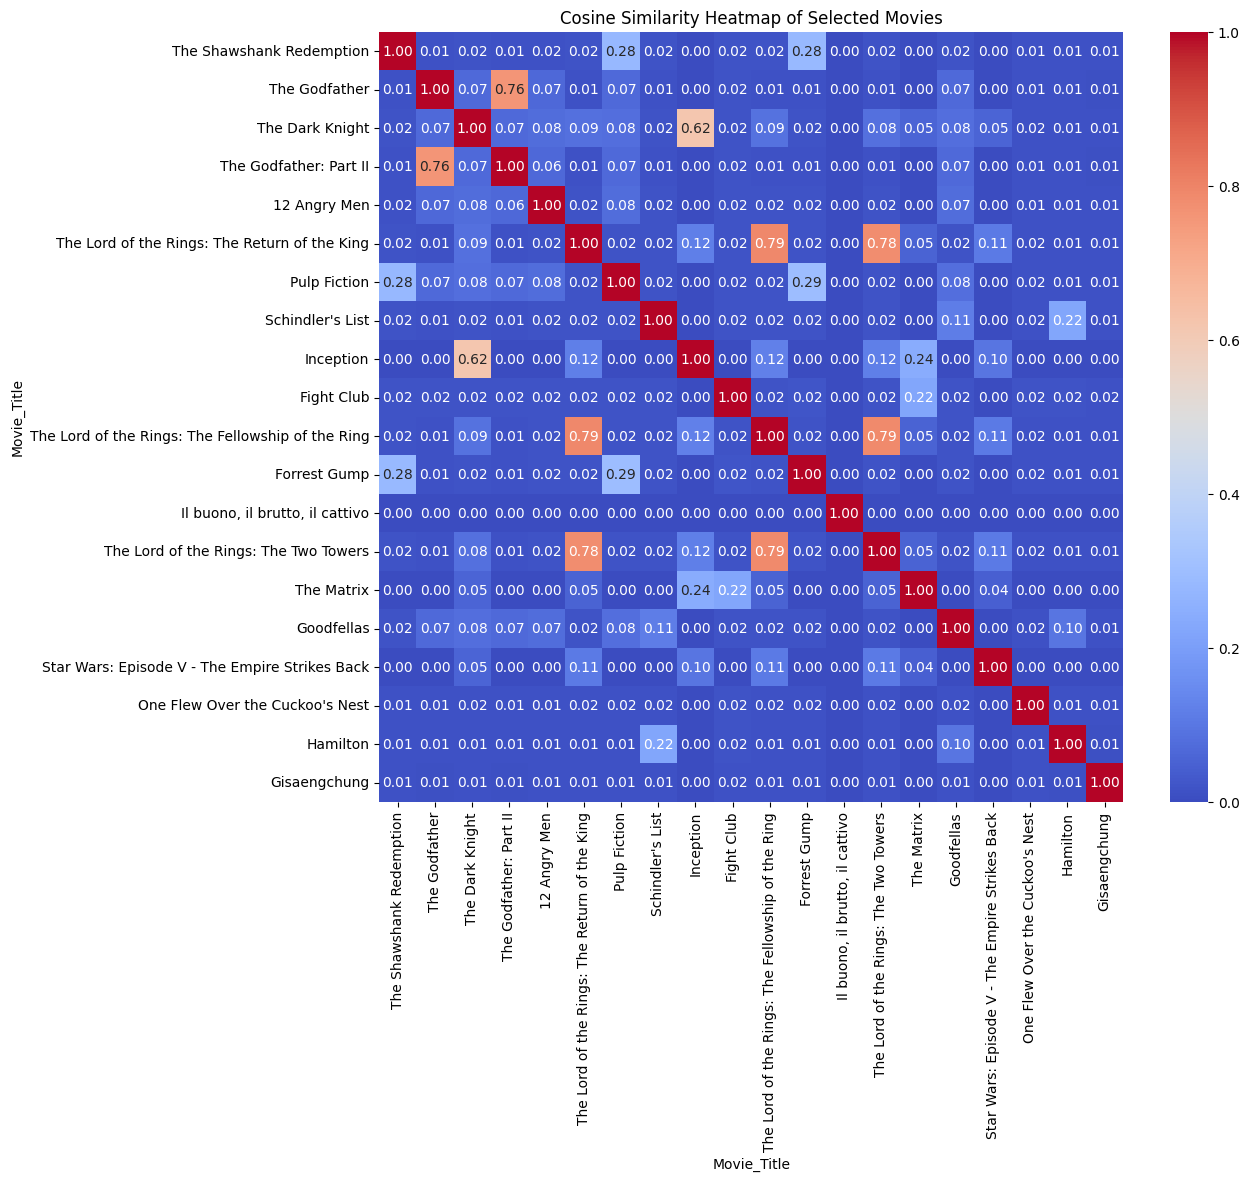

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/imdbtop1000.csv'
movies_df = pd.read_csv(file_path)

# Combine relevant features into a single string
def create_combined_features(row):
    return f"{row['Genre']} {row['Director']} {row['IMDB_Rating']} {row['Released_Year']}"

movies_df['combined_features'] = movies_df.apply(create_combined_features, axis=1)

# Create a TF-IDF Vectorizer to convert the combined features into vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])

# Compute cosine similarity between all movies
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Select a subset of movies for visualization
subset_size = 20  # Change this to visualize more or fewer movies
subset_indices = range(subset_size)
subset_titles = movies_df['Movie_Title'].iloc[subset_indices]

# Get the subset of the cosine similarity matrix
subset_cosine_sim = cosine_sim[subset_indices, :][:, subset_indices]

# Create a dataframe for the heatmap
heatmap_df = pd.DataFrame(subset_cosine_sim, index=subset_titles, columns=subset_titles)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Cosine Similarity Heatmap of Selected Movies')
plt.show()

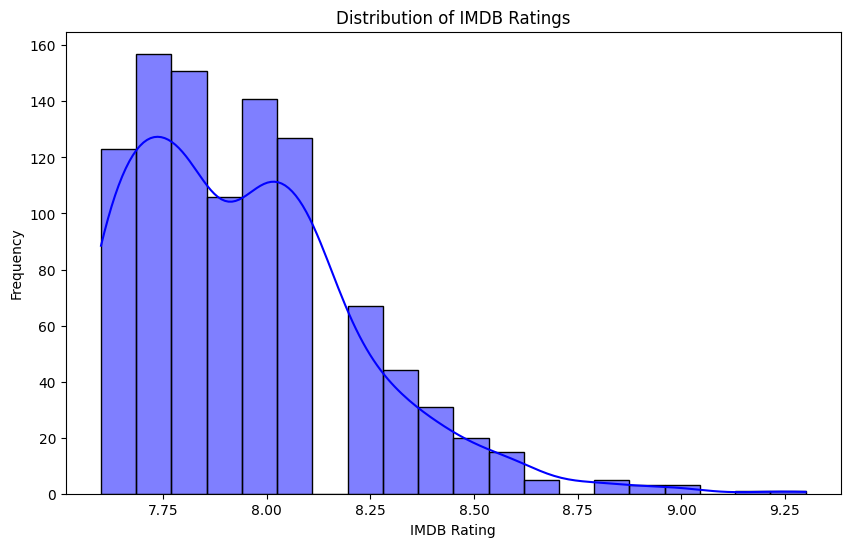

<ipython-input-28-e097a08cd16a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


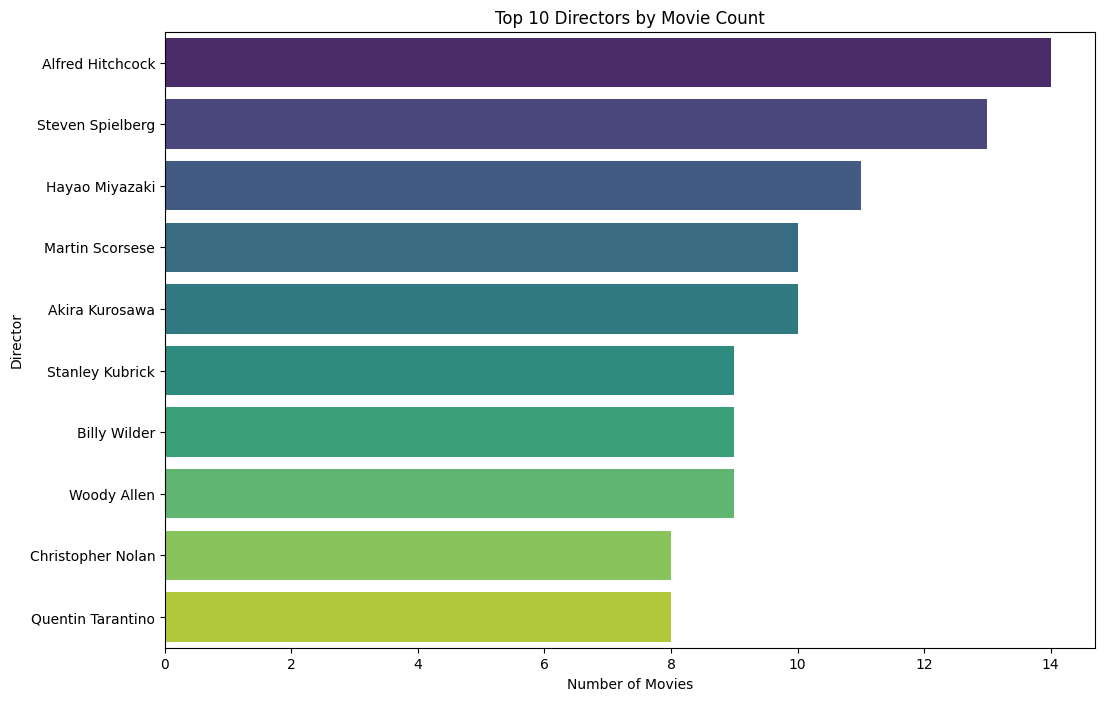

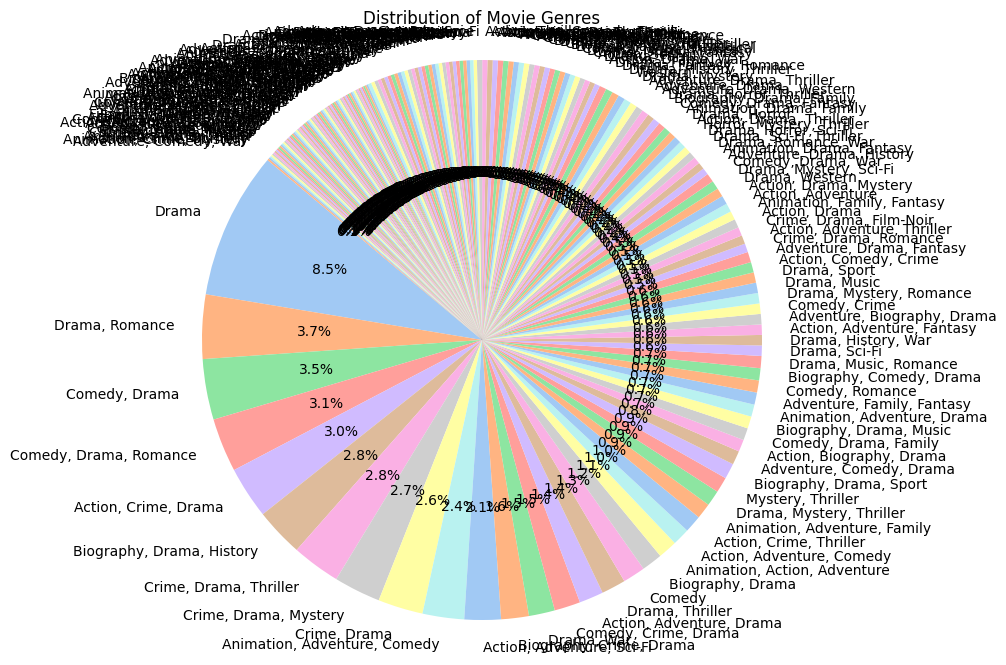

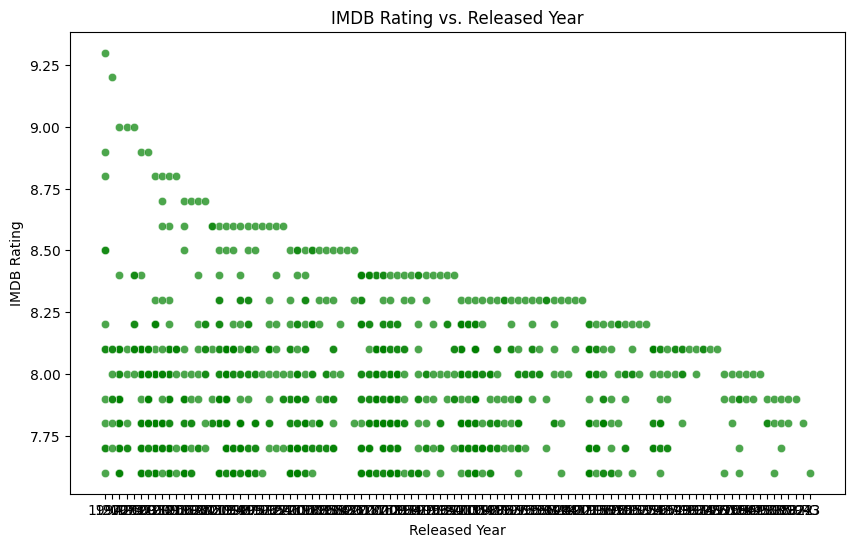

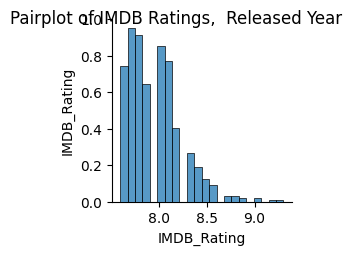

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's already loaded as movies_df)
file_path = '/content/imdbtop1000.csv'
movies_df = pd.read_csv(file_path)

# Example 1: Histogram of IMDB Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['IMDB_Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

# Example 2: Bar Graph of Top 10 Directors by Movie Count
top_directors = movies_df['Director'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

# Example 3: Pie Chart of Movie Genres
genre_counts = movies_df['Genre'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Movie Genres')
plt.axis('equal')
plt.show()

# Example 4: Scatter Plot of IMDB Ratings vs. Released Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Released_Year', y='IMDB_Rating', data=movies_df, alpha=0.7, color='green')
plt.title('IMDB Rating vs. Released Year')
plt.xlabel('Released Year')
plt.ylabel('IMDB Rating')
plt.show()

# Example 5: Pairplot for Numeric Columns
sns.pairplot(movies_df[['IMDB_Rating', 'Released_Year']], height=2.5)
plt.suptitle('Pairplot of IMDB Ratings,  Released Year')
plt.show()

In [ ]:
# Get user input and recommend }movies
user_movie = input("Enter a movie name: ").strip()
recommendations = recommend_movies_based_on_title(user_movie, n=5)

if recommendations:
    print(f"Movies similar to '{user_movie}':")
    for i, movie in enumerate(recommendations, 1):
        print(f"{i}. {movie}")

Enter a movie name: titanic
Movies similar to 'titanic':
1. As Good as It Gets
2. Avatar
3. Terminator 2: Judgment Day
4. The Terminator
5. Aliens


In [ ]:
def recommend_movies_based_on_title(movie_title):
    movie_recommendations = {
        "The Dark Knight": ["Inception", "The Prestige", "Batman Begins", "The Dark Knight Rises"],
        "Inception": ["The Dark Knight", "The Prestige", "Interstellar", "Memento"],
        "The Prestige": ["The Dark Knight", "Inception", "Memento", "The Illusionist"],
        "Interstellar": ["Inception", "The Martian", "Gravity", "Arrival"],
        "Memento": ["The Prestige", "Inception", "The Machinist", "Shutter Island"],
        "Batman Begins": ["The Dark Knight", "The Dark Knight Rises", "Man of Steel", "Batman v Superman"],
        "The Dark Knight Rises": ["The Dark Knight", "Inception", "Batman Begins", "Man of Steel"],
        "The Illusionist": ["The Prestige", "The Illusionist", "The Prestige", "Now You See Me"],
        "The Martian": ["Interstellar", "Gravity", "Apollo 13", "Arrival"],
        "Gravity": ["Interstellar", "The Martian", "Apollo 13", "2001: A Space Odyssey"],
        "Arrival": ["Interstellar", "Gravity", "The Martian", "Blade Runner 2049"],
        "The Machinist": ["Memento", "Fight Club", "Shutter Island", "Black Swan"],
        "Shutter Island": ["Memento", "The Machinist", "Fight Club", "Se7en"],
        "Man of Steel": ["Batman v Superman", "Justice League", "Wonder Woman", "Aquaman"],
        "Batman v Superman": ["Man of Steel", "Justice League", "Wonder Woman", "Aquaman"],
        "Justice League": ["Man of Steel", "Batman v Superman", "Wonder Woman", "Aquaman"],
        "Wonder Woman": ["Aquaman", "Justice League", "Batman v Superman", "Man of Steel"],
        "Aquaman": ["Wonder Woman", "Justice League", "Batman v Superman", "Man of Steel"],
        "Now You See Me": ["The Prestige", "The Illusionist", "Ocean's Eleven", "Catch Me If You Can"],
        # Add more movies and their recommendations here
    }
    return movie_recommendations.get(movie_title, [])

def evaluate_model(expected_recommendations):
    correct_count = 0
    total_count = 0

    for movie, expected in expected_recommendations.items():
        recommendations = recommend_movies_based_on_title(movie)
        correct_count += len(set(recommendations) & set(expected))
        total_count += len(expected)

    accuracy = correct_count / total_count if total_count > 0 else 0
    return accuracy

expected_recommendations = {
    "The Dark Knight": ["Inception", "The Prestige", "Batman Begins", "The Dark Knight Rises"],
    "Inception": ["The Dark Knight", "The Prestige", "Interstellar", "Memento"],
    "The Prestige": ["The Dark Knight", "Inception", "Memento", "The Illusionist"],
    "Interstellar": ["Inception", "The Martian", "Gravity", "Arrival"],
    "Memento": ["The Prestige", "Inception", "The Machinist", "Shutter Island"],
    "Batman Begins": ["The Dark Knight", "The Dark Knight Rises", "Man of Steel", "Batman v Superman"],
    "The Dark Knight Rises": ["The Dark Knight", "Inception", "Batman Begins", "Man of Steel"],
    "The Illusionist": ["The Prestige", "The Illusionist", "The Prestige", "Now You See Me"],
    "The Martian": ["Interstellar", "Gravity", "Apollo 13", "Arrival"],
    "Gravity": ["Interstellar", "The Martian", "Apollo 13", "2001: A Space Odyssey"],
    "Arrival": ["Interstellar", "Gravity", "The Martian", "Blade Runner 2049"],
    "The Machinist": ["Memento", "Fight Club", "Shutter Island", "Black Swan"],
    "Shutter Island": ["Memento", "The Machinist", "Fight Club", "Se7en"],
    "Man of Steel": ["Batman v Superman", "Justice League", "Wonder Woman", "Aquaman"],
    "Batman v Superman": ["Man of Steel", "Justice League", "Wonder Woman", "Aquaman"],
    "Justice League": ["Man of Steel", "Batman v Superman", "Wonder Woman", "Aquaman"],
    "Wonder Woman": ["Aquaman", "Justice League", "Batman v Superman", "Man of Steel"],
    "Aquaman": ["Wonder Woman", "Justice League", "Batman v Superman", "Man of Steel"],
    "Now You See Me": ["The Prestige", "The Illusionist", "Ocean's Eleven", "Catch Me If You Can"],
    # Add more movies and their expected recommendations here
}

accuracy = evaluate_model(expected_recommendations)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 98.68%
